# case study gtex_v8


> See the setup notebook if this is a new workspace

> Load example data from AnVIL

In [5]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [6]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide


In [7]:
graph = load_graph('gtex_v8', manifests.gtex_v8_file_paths(), expected_resource_count=5062, strict=True, check_edges=True)

### Draw a summary graph

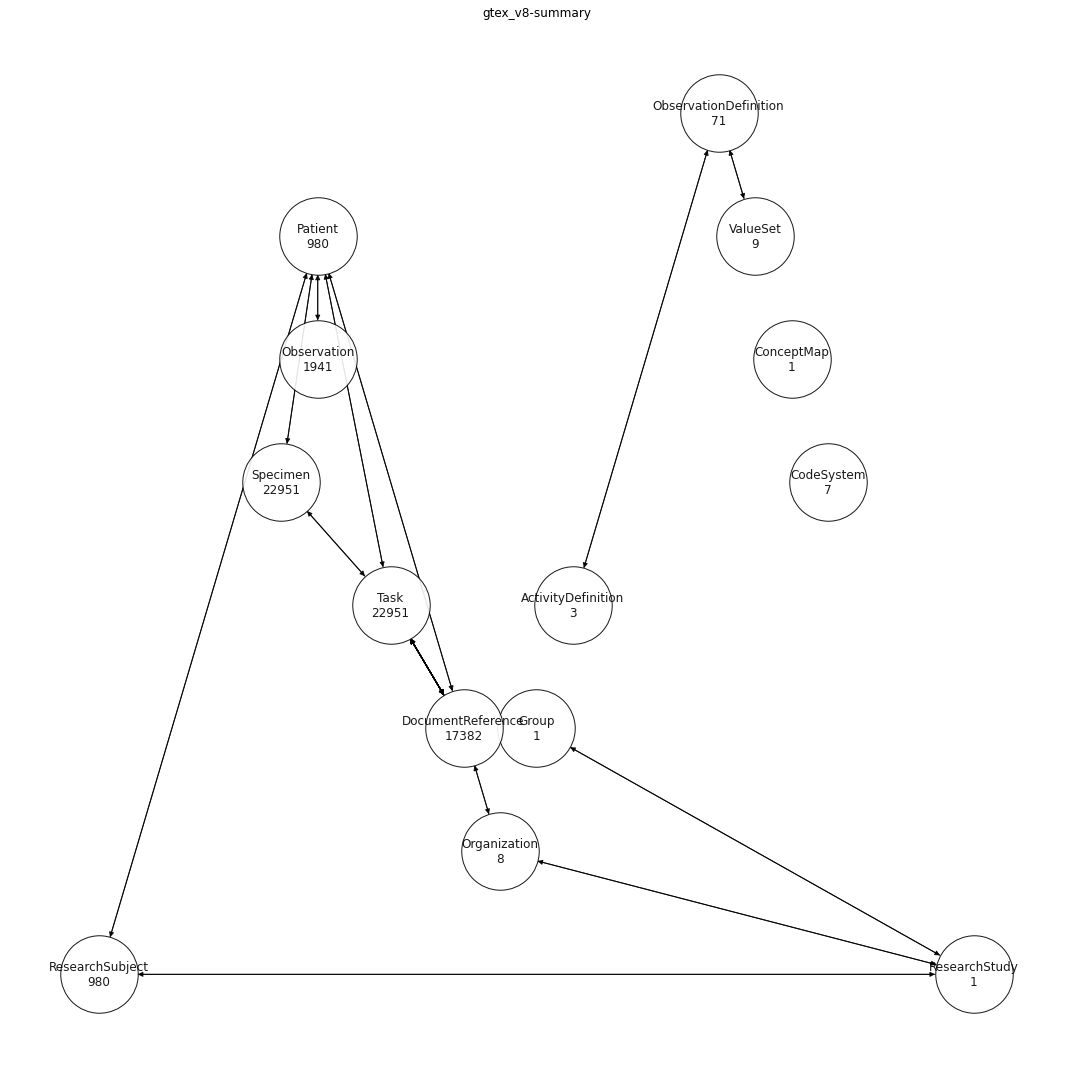

In [8]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'gtex_v8-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [9]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 980, "should have 980 patients"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [10]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_tag_0_system,meta_tag_0_code,identifier_0_use,identifier_0_system,identifier_0_value,gender,resourceType
0,0f2f77e4-fd3d-48cf-8857-65489286e95f,MTY1NjEwMjkxOTA4MDk1MjAwMA,2022-06-24T20:35:19.080952+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-YEC3,male,Patient
1,d5cff7d0-d90e-4cba-9a13-a0468488f867,MTY1NjEwMjkxOTA2NTU4NjAwMA,2022-06-24T20:35:19.065586+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-1QP29,male,Patient
2,e891e60c-e9ff-40bd-9337-dcbc3c355134,MTY1NjEwMjkxOTA0MjMyMDAwMA,2022-06-24T20:35:19.042320+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-1K2DU,male,Patient
3,3129a62f-d34c-4ed4-bf68-71235915bb8c,MTY1NjEwMjkxOTAxOTgxMjAwMA,2022-06-24T20:35:19.019812+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-13JUV,female,Patient
4,a3b67d53-9e5a-4958-b4da-58c02c81cb78,MTY1NjEwMjkxOTAwMjAwODAwMA,2022-06-24T20:35:19.002008+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-1F48J,female,Patient
...,...,...,...,...,...,...,...,...,...,...
975,eda46df0-18bf-4c6d-848b-6e07c6598711,MTY1NjEwMjkwMDUxMTUyOTAwMA,2022-06-24T20:35:00.511529+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-1RDX4,female,Patient
976,ccf6bc0e-aa26-4500-834c-99490391c9dd,MTY1NjEwMjkwMDUxMDg1NjAwMA,2022-06-24T20:35:00.510856+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-ZUA1,male,Patient
977,aba5ca86-2afa-461b-b3c4-d8be65e3f3ac,MTY1NjEwMjkwMDUxMDczMTAwMA,2022-06-24T20:35:00.510731+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-PWCY,female,Patient
978,0cdcb821-32b6-4cd6-95e7-60fac56df03c,MTY1NjEwMjkwMDUwOTM4NTAwMA,2022-06-24T20:35:00.509385+00:00,https://anvilproject.org/gtex/fhir/researchstudy,GTEx,official,https://anvilproject.org/gtex/fhir/patient,GTEX-13O3O,female,Patient


### Show simplified details

> 1/3 the number of columns

In [11]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_tag_researchstudy,identifier_https://anvilproject.org/gtex/fhir/patient,gender
0,0f2f77e4-fd3d-48cf-8857-65489286e95f,MTY1NjEwMjkxOTA4MDk1MjAwMA,2022-06-24T20:35:19.080952+00:00,GTEx,GTEX-YEC3,male
1,d5cff7d0-d90e-4cba-9a13-a0468488f867,MTY1NjEwMjkxOTA2NTU4NjAwMA,2022-06-24T20:35:19.065586+00:00,GTEx,GTEX-1QP29,male
2,e891e60c-e9ff-40bd-9337-dcbc3c355134,MTY1NjEwMjkxOTA0MjMyMDAwMA,2022-06-24T20:35:19.042320+00:00,GTEx,GTEX-1K2DU,male
3,3129a62f-d34c-4ed4-bf68-71235915bb8c,MTY1NjEwMjkxOTAxOTgxMjAwMA,2022-06-24T20:35:19.019812+00:00,GTEx,GTEX-13JUV,female
4,a3b67d53-9e5a-4958-b4da-58c02c81cb78,MTY1NjEwMjkxOTAwMjAwODAwMA,2022-06-24T20:35:19.002008+00:00,GTEx,GTEX-1F48J,female
...,...,...,...,...,...,...
975,eda46df0-18bf-4c6d-848b-6e07c6598711,MTY1NjEwMjkwMDUxMTUyOTAwMA,2022-06-24T20:35:00.511529+00:00,GTEx,GTEX-1RDX4,female
976,ccf6bc0e-aa26-4500-834c-99490391c9dd,MTY1NjEwMjkwMDUxMDg1NjAwMA,2022-06-24T20:35:00.510856+00:00,GTEx,GTEX-ZUA1,male
977,aba5ca86-2afa-461b-b3c4-d8be65e3f3ac,MTY1NjEwMjkwMDUxMDczMTAwMA,2022-06-24T20:35:00.510731+00:00,GTEx,GTEX-PWCY,female
978,0cdcb821-32b6-4cd6-95e7-60fac56df03c,MTY1NjEwMjkwMDUwOTM4NTAwMA,2022-06-24T20:35:00.509385+00:00,GTEx,GTEX-13O3O,female


## Navigate using FHIR references

In [12]:
research_subjects = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'ResearchSubject')]
patients = [research_subject.individual for research_subject in research_subjects]
f"research_subjects: {len(research_subjects)} patients: {len(patients)}"

'research_subjects: 980 patients: 980'

In [13]:
document_references = [dict_['resource'] for id_, dict_ in  find_by_resource_type(graph, 'DocumentReference')]
f"document_references: {len(document_references)}"

'document_references: 17382'

## Navigate using graph paths

> Since we provided links in both directions, we can ask the graph to traverse from Patient to ResearchStudy or Observation.  This provides similar functionality to FHIR's _revinclude

In [14]:
patient_id = 'Patient/0f2f77e4-fd3d-48cf-8857-65489286e95f'
research_studies = find_nearest(graph, patient_id, 'ResearchStudy')
assert research_studies[0], f"Should traverse Patient to ResearchStudy {research_studies}"
research_study = graph.nodes[research_studies[0]]['resource'] 
observations = [edge[0] for edge in graph.in_edges(patient_id) if 'Observation' in edge[0]]

f"{patient_id} belongs to ResearchStudy {research_study.identifier[0].value}, and has {len(observations)} observations"


'Patient/0f2f77e4-fd3d-48cf-8857-65489286e95f belongs to ResearchStudy GTEx, and has 2 observations'

## Create data frame of specimens with associated patient observations and documents

In [47]:
from collections import defaultdict

# use the task to associate documents associated with specimens

def specimen_view_factory():
    return {'attachments': [], 'subject': None, 'specimen': None}


specimens_to_documents = defaultdict(specimen_view_factory)
tasks = [graph_attributes['resource'] for id_, graph_attributes in  find_by_resource_type(graph, 'Task')]

for task in tasks:
    if task.output:
        specimen = task.focus.reference    
        specimens_to_documents[specimen]['attachments'] = [
            dr.valueReference.resolved().content[0].attachment 
            for dr in task.output if dr.valueReference and 'DocumentReference' in dr.valueReference.reference
        ]
        specimens_to_documents[specimen]['subject'] = task.for_fhir.reference
        specimens_to_documents[specimen]['specimen'] = specimen
        specimens_to_documents[specimen]['body_site'] = task.focus.resolved().collection.bodySite.coding[0].code

for specimen_id, specimen_view in specimens_to_documents.items():
    for index, attachment in enumerate(specimen_view['attachments']):
        specimen_view[f"attachment_{index}_title"] = attachment.title
        specimen_view[f"attachment_{index}_url"] = attachment.url
    del specimen_view['attachments']
    

# flatten observations associated with subjects

def subject_view_factory():
    return {'observations': [], 'subject': None, 'gender': None}

subjects_to_observations = defaultdict(subject_view_factory)
observations = [graph_attributes['resource'] for id_, graph_attributes in  find_by_resource_type(graph, 'Observation')]

for observation in observations:
    subject = observation.subject.reference
    gender = observation.subject.resolved().gender
    subjects_to_observations[subject]['observations'].append(observation)
    subjects_to_observations[subject]['subject'] = subject
    subjects_to_observations[subject]['gender'] = gender


for subject_id, subject_view in subjects_to_observations.items():
    for index, observation in enumerate(subject_view['observations']):        
        subject_view[observation.code.coding[0].code] = next(iter([v.as_simplified_json()[0] for k, v in vars(observation).items() if k.startswith('value') and v ]), None)
    del subject_view['observations']

# combine the two views, create data frame with specimen as index    
    
data_frame = [ 
    flatten({
        **specimen_to_documents,
        **subjects_to_observations[specimen_to_documents['subject']]        
    })
    for specimen_to_documents in specimens_to_documents.values()
]
    
pd.DataFrame(data_frame).fillna('').set_index('specimen')

,subject,body_site,gender,dthhrdy_coding_DTHHRDY,dthhrdy_text,Age_low_value,Age_low_unit,Age_low_system,Age_low_code,Age_high_value,Age_high_unit,Age_high_system,Age_high_code,attachment_0_title,attachment_0_url
specimen,,,,,,,,,,,,,,,
Specimen/e910cfc3-bfe1-4b2f-aa99-55987efa7ac4,Patient/5c5fe3dd-c850-4fb7-80a6-292315243abc,UBERON:0008367,female,Ventilator-Case,0,60,year,http://unitsofmeasure.org,a,69,year,http://unitsofmeasure.org,a,,
Specimen/83473264-73ed-4bc1-8573-2155aa9c91a2,Patient/ca2514ce-38fc-4d3c-a15e-7097949783bd,UBERON:0001621,female,Ventilator-Case,0,20,year,http://unitsofmeasure.org,a,29,year,http://unitsofmeasure.org,a,GTEX-1LGOU-0426-SM-D3L8O-tpm.tsv.gz,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...
Specimen/b77bb3f6-a5cf-4b4b-b5b0-6e8f51b90960,Patient/442624f8-dce2-4a8d-90ed-df3d8193ca8d,C16403,male,Intermediate-death,3,50,year,http://unitsofmeasure.org,a,59,year,http://unitsofmeasure.org,a,GTEX-117YW-0008-SM-5QGRD-tpm.tsv.gz,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...
Specimen/b0c3b3c6-e552-493f-abb1-38769b70dec7,Patient/e1a637ae-e342-4a28-ab99-829c40001fbf,UBERON:0002190,female,Ventilator-Case,0,60,year,http://unitsofmeasure.org,a,69,year,http://unitsofmeasure.org,a,GTEX-148VI-1726-SM-5S2W9-tpm.tsv.gz,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...
Specimen/62b82422-87d2-422e-a765-89325aa398e7,Patient/0513ae19-2f60-47dc-aa37-09c8f06fbf83,UBERON:0006631,male,Ventilator-Case,0,20,year,http://unitsofmeasure.org,a,29,year,http://unitsofmeasure.org,a,GTEX-1IDJF-0826-SM-ARU7N-tpm.tsv.gz,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specimen/3e567144-c5ee-40f1-9aba-3804451e3872,Patient/bc0ba26b-fb64-4ae8-ace3-864e4a4daee2,UBERON:0007610,male,Ventilator-Case,0,50,year,http://unitsofmeasure.org,a,59,year,http://unitsofmeasure.org,a,GTEX-ZEX8-2626-SM-DO92R-tpm.tsv.gz,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...
Specimen/d13cabd8-400d-4f77-a05e-4fe1f8aab90a,Patient/9a38a50a-7388-4ea4-a3bd-7d3e5c162a30,UBERON:0000007,female,Fast-death-of-natural-causes,2,70,year,http://unitsofmeasure.org,a,79,year,http://unitsofmeasure.org,a,GTEX-15DCD-3026-SM-6PALL-tpm.tsv.gz,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...
Specimen/e88e0dc2-8e33-424c-a071-5e19c7850a39,Patient/432b54f2-9f35-4c54-abf5-362abc8ca855,UBERON:0002046,male,Ventilator-Case,0,60,year,http://unitsofmeasure.org,a,69,year,http://unitsofmeasure.org,a,GTEX-111YS-0726-SM-5GZY8-tpm.tsv.gz,gs://fc-a2df0708-c407-468e-a93f-00a42640ee56/t...
